*Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.*

In [105]:
import pandas as pd

In [106]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [107]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [108]:
# traduzindo o nome das colunas do arquivo de dados para o ptbr
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title' : 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'USD',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [109]:
# .dropna() -> remove as linhas que possuem valores nulos
df_limpo = df.dropna()

In [141]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [143]:
# Modificando o nome das categorias no arquivo base
senioridade = {
    'EN': 'Júnior',
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EX': 'Especialista'
}

df["senioridade"] = df["senioridade"].replace(senioridade)
df["senioridade"].value_counts()

senioridade
Sênior          77241
Pleno           40465
Júnior          12443
Especialista     3200
Name: count, dtype: int64

*Iniciando a visualização gráfica dos dados*

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

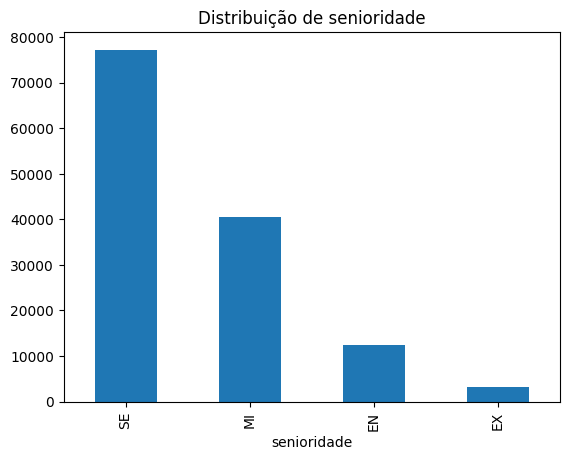

In [112]:
# Este código cria um gráfico de barras que mostra a contagem de valores na coluna 'senioridade'
# .value_counts() conta a frequência de cada valor único na coluna
# .plot(kind="bar") gera um gráfico de barras com essas contagens
# title="Distribuição de senioridade" adiciona um título ao gráfico

df_limpo['senioridade'].value_counts().plot(kind="bar", title="Distribuição de senioridade")

In [113]:
import seaborn as sns

*O Seaborn: É uma biblioteca de visualização de dados baseada no Matplotlib. Fornece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos O alias 'sns' é comumente usado como abreviação*

<Axes: xlabel='senioridade', ylabel='USD'>

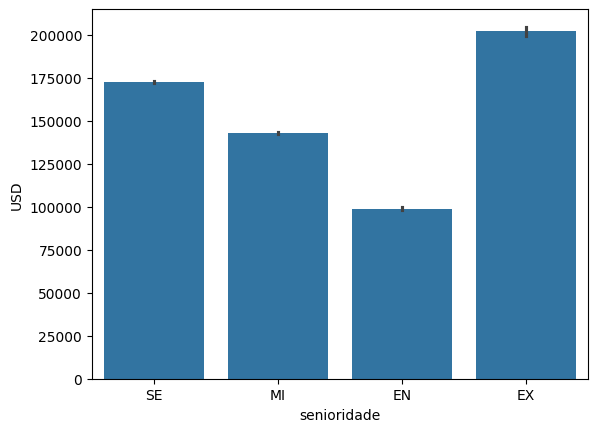

In [114]:
sns.barplot(data=df_limpo, x="senioridade", y="USD")

*Personalizando o gráfico para adicionar mais informações no gráfico*

In [115]:
import matplotlib.pyplot as plt

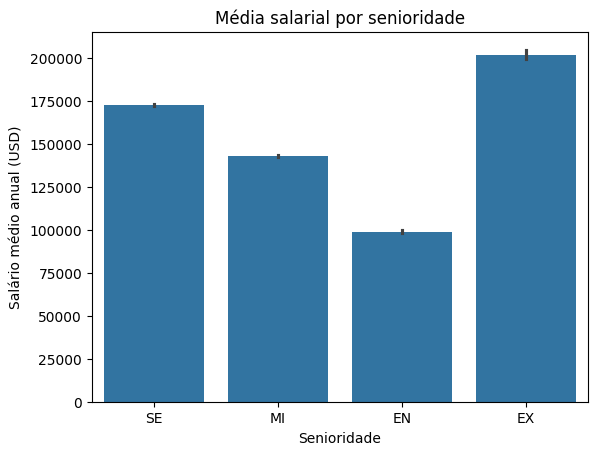

In [116]:
plt.Figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="senioridade", y="USD")
plt.title("Média salarial por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")

plt.show()

*Ordenar as barras do gráfico da maior barra para a menor barra*

<Axes: xlabel='senioridade'>

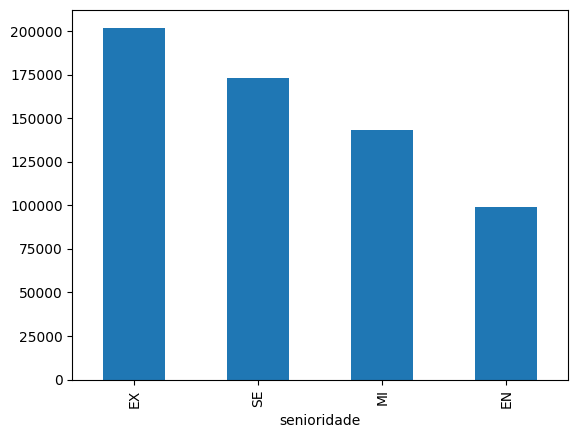

In [117]:
df_limpo.groupby("senioridade")["USD"].mean().sort_values(ascending=False).plot(kind="bar")

*Agrupar os dados por senioridade e calcula a média salarial em USD para cada grupo. Ordenando os valores em ordem decrescente. Por fim, cria um gráfico de barras com os resultados*

In [118]:
# Outra forma de chegar ao mesmo resultado de ordenamento das barras do gráfico anterior

ordem = df_limpo.groupby("senioridade")["USD"].mean().sort_values(ascending=False).index
ordem

Index(['EX', 'SE', 'MI', 'EN'], dtype='object', name='senioridade')

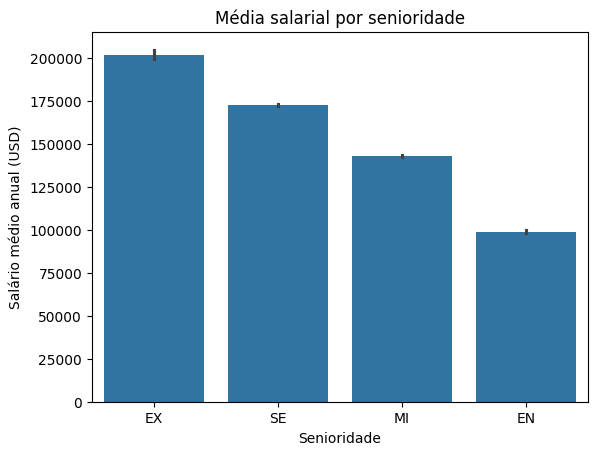

In [119]:
plt.Figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="senioridade", y="USD", order = ordem)
plt.title("Média salarial por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")

plt.show()

*Ordenar as barras do gráfico da menor barra para a maior barra*

<Axes: xlabel='senioridade'>

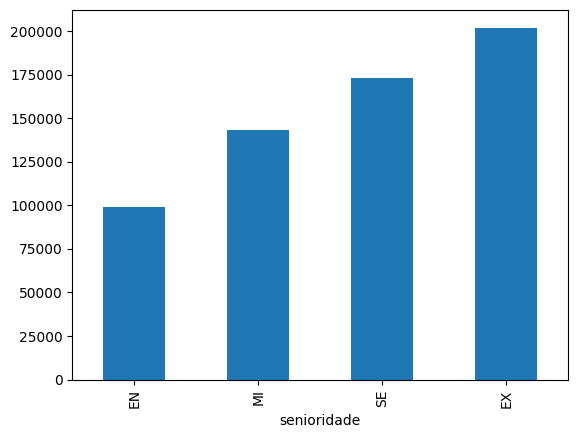

In [120]:
df_limpo.groupby("senioridade")["USD"].mean().sort_values(ascending=True).plot(kind="bar")

*Gráfico do tipo Histograma*

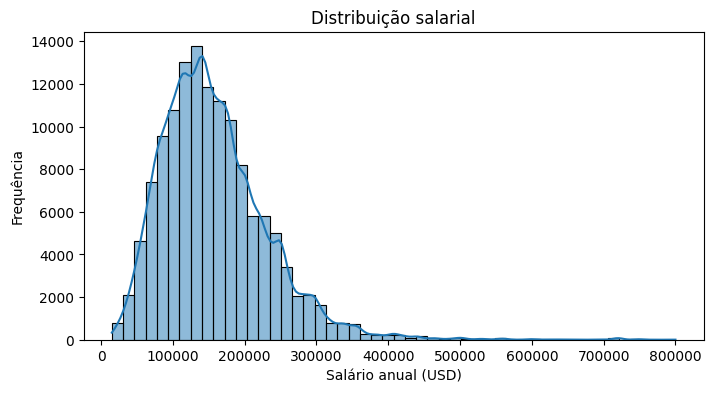

In [121]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo["USD"], bins=50, kde=True)
plt.title("Distribuição salarial")
plt.xlabel("Salário anual (USD)")
plt.ylabel("Frequência")

plt.show()

*No histograma  os valores estão voltados para os salarios mais baixos, caracterizando uma distribuição anormal. O normal seria o pico do histograma seria central.*

*Fazendo ajustes*

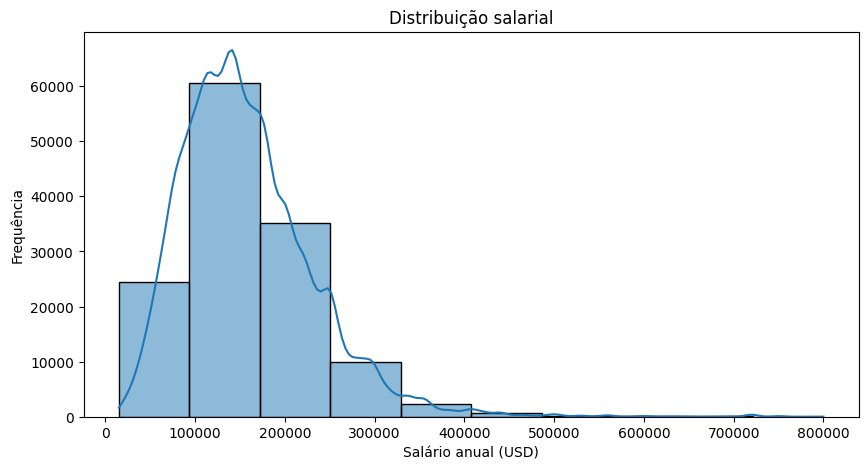

In [122]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo["USD"], bins=10, kde=True)
plt.title("Distribuição salarial")
plt.xlabel("Salário anual (USD)")
plt.ylabel("Frequência")

plt.show()

# Este código cria uma visualização da distribuição salarial usando:
# - plt.figure(figsize=(10,5)) - Define o tamanho da figura como 10x5 polegadas
# - sns.histplot() - Gera um histograma dos salários em USD
#   - bins -- divide os dados em 5 intervalos/barras
#   - kde=True adiciona uma curva de densidade estimada
# - plt.title() - Adiciona o título "Distribuição salarial" 
# - plt.xlabel() - Rotula o eixo X como "Salário anual (USD)"
# - plt.ylabel() - Rotula o eixo Y como "Frequência"
# - plt.show() - Exibe o gráfico

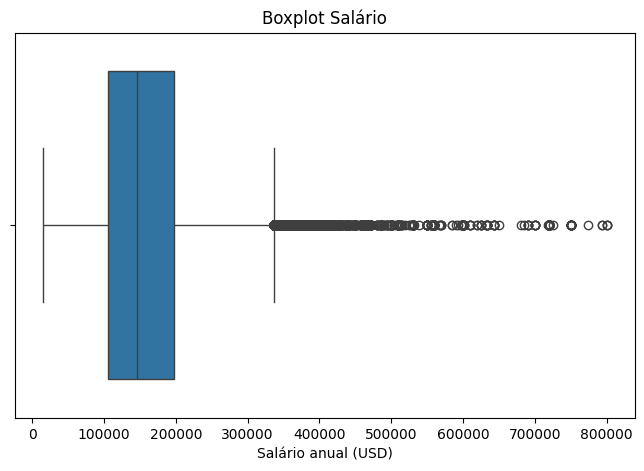

In [123]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df_limpo["USD"])
plt.title("Boxplot Salário")
plt.xlabel("Salário anual (USD)")

plt.show()

**Sobre o gráfico com boxplot**

*A linha central representa a mediana. E após a extremidade direita, são os dados discrepantes, as exceções*

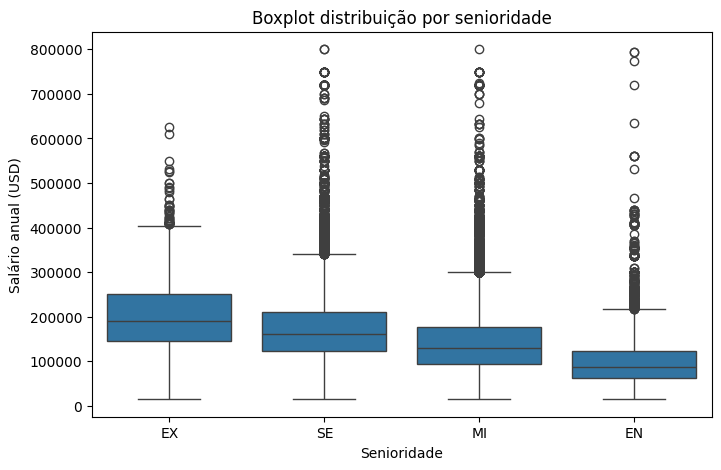

In [124]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x="senioridade", y="USD", order = ordem)
plt.title("Boxplot distribuição por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário anual (USD)")

plt.show()

*Paletas de cores para o gráfico*

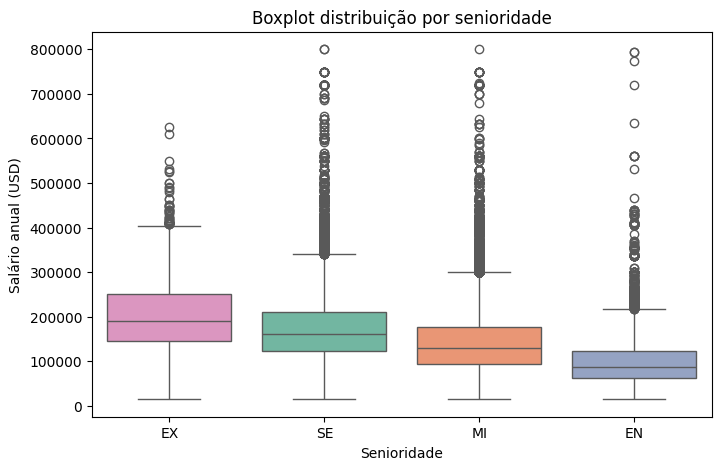

In [125]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'especialista']

plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x="senioridade", y="USD", order = ordem, palette="Set2", hue='senioridade')
plt.title("Boxplot distribuição por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário anual (USD)")

plt.show()

*Gráficos interativos*

In [130]:
import plotly.express as px

In [127]:
senioridade_media_salarial = df_limpo.groupby("senioridade")["USD"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salarial, x="senioridade", y="USD", title="Média salarial por senioridade", labels= {"senioridade" : "Nível de senioridade","USD" : "Salário médio anual (USD)"})

fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Nível de senioridade=%{x}<br>Salário médio anual (USD)=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['EX', 'SE', 'MI', 'EN'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'exSuV12pCEG8C9e0lhkFQbGbkMQmdgFB+EGKaa8t+EA=', 'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Média salarial por senioridade'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Nível de senioridade'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Salário médio anual (USD)'}}}
})

In [140]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem, names="tipo_trabalho", values="quantidade", title="Proporção dos tipos de trabalho")

fig


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'tipo_trabalho=%{label}<br>quantidade=%{value}<extra></extra>',
              'labels': {'bdata': 'AGQy', 'dtype': 'i1'},
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': {'bdata': 'WZsBAERsAAA+AQAA', 'dtype': 'i4'}}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Proporção dos tipos de trabalho'}}
})

In [144]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem, names="tipo_trabalho", values="quantidade", title="Proporção dos tipos de trabalho", hole = 0.5)

fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hole': 0.5,
              'hovertemplate': 'tipo_trabalho=%{label}<br>quantidade=%{value}<extra></extra>',
              'labels': {'bdata': 'AGQy', 'dtype': 'i1'},
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': {'bdata': 'WZsBAERsAAA+AQAA', 'dtype': 'i4'}}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Proporção dos tipos de trabalho'}}
})

In [145]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem, names="tipo_trabalho", values="quantidade", title="Proporção dos tipos de trabalho", hole = 0.5)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hole': 0.5,
              'hovertemplate': 'tipo_trabalho=%{label}<br>quantidade=%{value}<extra></extra>',
              'labels': {'bdata': 'AGQy', 'dtype': 'i1'},
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': {'bdata': 'WZsBAERsAAA+AQAA', 'dtype': 'i4'}}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Proporção dos tipos de trabalho'}}
})

Palavra-chave: MATPLOLIB